<a href="https://colab.research.google.com/github/fxmike/data-science-bootcamp/blob/main/07_uczenie_glebokie/02_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.express as px
tf.__version__

'2.5.0'

wprowadzenie - pierwszy model || model sekwencyjny to liniowy stos warstw

In [4]:
from tensorflow.keras.models import Sequential

model = Sequential()
print(model)

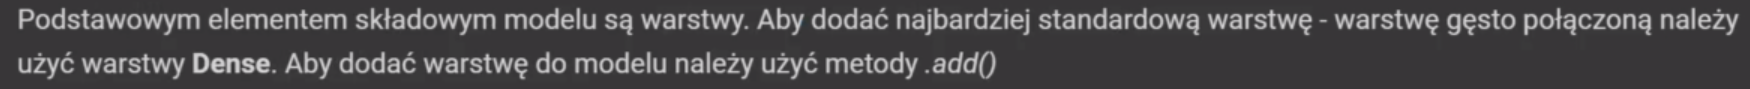

In [6]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=4, input_shape=(10,)))

wyświetlenie podsumowania modelu: .summary()

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 44        
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


dodanie kolejnej warstwy

In [8]:
model.add(Dense(units=2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 44        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


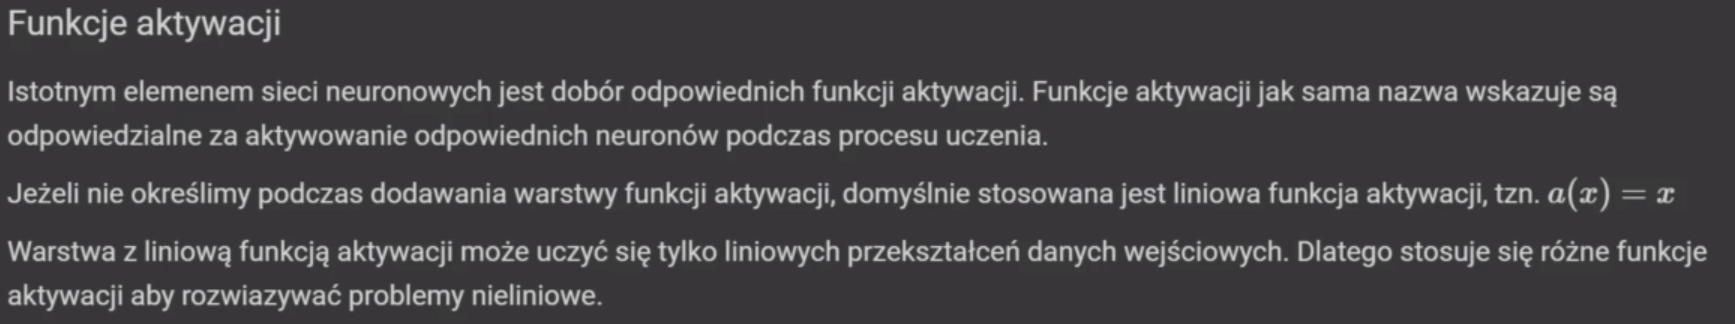

In [10]:
from tensorflow.keras.activations import linear

random_data = np.linspace(start=-3, stop=3, num=300)

data = pd.DataFrame({'data':random_data, 'linear':linear(random_data)})
data.head()

,data,linear
0,-3.000000,-3.000000
1,-2.979933,-2.979933
2,-2.959866,-2.959866
3,-2.939799,-2.939799
4,-2.919732,-2.919732


In [11]:
px.line(data, x='data', y='linear', width=500, height=500, range_y=[-3,3])

In [12]:
from tensorflow.keras.activations import sigmoid

data = pd.DataFrame({'data': random_data, 'sigmoid':sigmoid(random_data)})
data.head()

,data,sigmoid
0,-3.000000,0.047426
1,-2.979933,0.048341
2,-2.959866,0.049272
3,-2.939799,0.050221
4,-2.919732,0.051187


In [14]:
px.line(data, x='data', y='sigmoid', width=500, height=500, range_y=[-0.5, 1.5])

In [16]:
from tensorflow.keras.activations import relu

data = pd.DataFrame({'data': random_data, 'relu':relu(random_data)})
data.head()
#funkcja relu zeruje wartości ujemne

,data,relu
0,-3.000000,0.0
1,-2.979933,0.0
2,-2.959866,0.0
3,-2.939799,0.0
4,-2.919732,0.0


In [17]:
px.line(data, x='data', y='relu', width=500, height=500, range_y=[-0.5, 1.5])

In [18]:
from tensorflow.keras.activations import tanh

data = pd.DataFrame({'data': random_data, 'tanh':tanh(random_data)})
data.head()
#funkcja relu zeruje wartości ujemne

,data,tanh
0,-3.000000,-0.995055
1,-2.979933,-0.994853
2,-2.959866,-0.994643
3,-2.939799,-0.994424
4,-2.919732,-0.994196


In [20]:
px.line(data, x='data', y='tanh', width=500, height=500, range_y=[-1.5, 1.5])

In [21]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(10,)))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


Kompilacja modelu

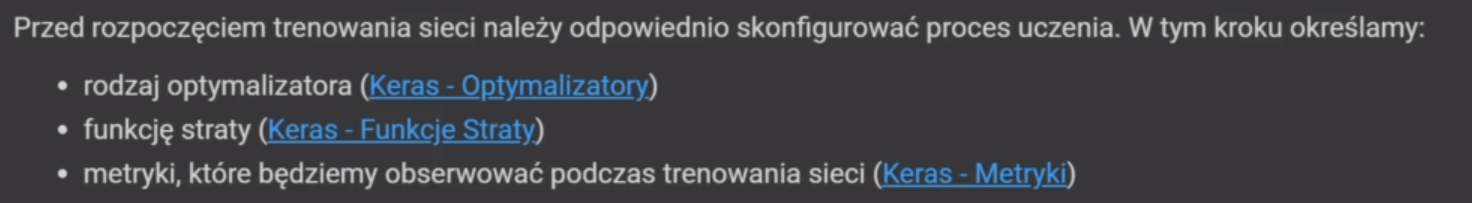

In [22]:
#klasyfikacja binarna

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#klasyfkacja wieloklasowa

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#regresja

model.compile(optimizer='rmsprop',
              loss='mse')


trenowanie modelu - należy przekazać numpy arrays

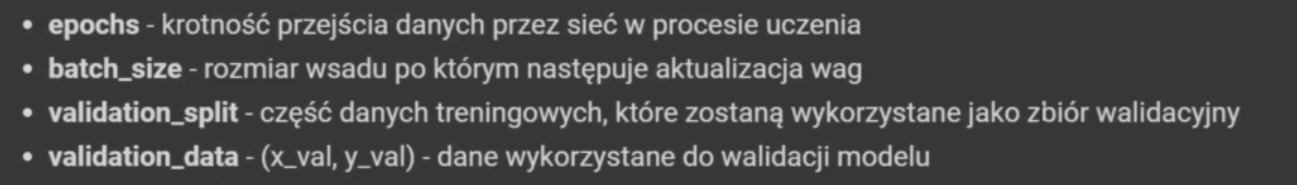

przykład - klasyfkiacja binarna

In [23]:
data = np.random.randn(10000, 150)
labels = np.random.randint(2, size=(10000,1))

print(data.shape)
print(labels.shape)

(10000, 150)
(10000, 1)


In [24]:
data[:3]

array([[ 2.07256286e-01,  2.79738699e-01,  7.42717492e-01,
        -2.10819869e+00,  2.16608335e-01,  9.99029219e-01,
         1.75016335e-02, -1.53840805e-01,  1.99430912e-01,
         4.90416300e-01,  2.11071453e-01, -1.31943913e+00,
         3.71161634e-01,  6.94454664e-01,  2.18518901e-01,
        -7.24479442e-01,  1.95079442e+00,  1.50189873e+00,
         3.24426602e-01, -7.46856833e-01,  1.06761385e+00,
         3.71822645e-01, -2.02032285e-01, -7.47028631e-02,
         3.82145279e-01, -1.37049183e+00,  6.67876604e-01,
        -1.87986183e+00, -1.89179453e+00,  3.79986542e-01,
         6.89127531e-01, -7.67899875e-02, -1.55203588e-01,
        -1.28769234e+00,  6.01896958e-01, -4.16492673e-01,
        -1.66297944e+00, -1.77551857e+00,  9.34249706e-01,
         5.93189434e-01, -1.06951454e+00,  9.88134956e-01,
         3.95316671e-01,  7.24902619e-03,  1.19539923e-01,
        -9.17051778e-02, -1.91378533e-01,  1.64784781e+00,
         1.13956175e-03,  4.58671744e-01,  1.93843384e+0

In [25]:
labels[:10]

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0]])

In [28]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels, epochs=20)

Epoch 1/20
313/313 [==============================] - 1s 1ms/step - loss: 0.7746 - accuracy: 0.4991
Epoch 2/20
313/313 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5406
Epoch 3/20
313/313 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5768
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.5998
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6266
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.6459
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.6649
Epoch 8/20
313/313 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.6806
Epoch 9/20
313/313 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.6924
Epoch 10/20
313/313 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.7035

In [29]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=20, batch_size=64) #batch_size >> co ile próbek aktualizowane są wagi w modelu

Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 0.7548 - accuracy: 0.4926
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.5321
Epoch 3/20
157/157 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5586
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5795
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6007
Epoch 6/20
157/157 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6178
Epoch 7/20
157/157 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.6329
Epoch 8/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6499
Epoch 9/20
157/157 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.6576
Epoch 10/20
157/157 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.6710

In [30]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2)
#kluczowe jest dopasowanie modelu do danych walidacyjnych (danych, których model nie widział)

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 0.7470 - accuracy: 0.4974 - val_loss: 0.7250 - val_accuracy: 0.5000
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5441 - val_loss: 0.7201 - val_accuracy: 0.4865
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5782 - val_loss: 0.7207 - val_accuracy: 0.4765
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6009 - val_loss: 0.7220 - val_accuracy: 0.4885
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6261 - val_loss: 0.7252 - val_accuracy: 0.4865
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.6474 - val_loss: 0.7341 - val_accuracy: 0.4920
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6653 - val_loss: 0.7394 - val_accuracy: 0.4865
Epoch 

In [32]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

In [33]:
history

In [34]:
metrics = history.history
metrics.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 0.7687 - accuracy: 0.4952 - val_loss: 0.7372 - val_accuracy: 0.4950
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.5418 - val_loss: 0.7297 - val_accuracy: 0.4975
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5799 - val_loss: 0.7301 - val_accuracy: 0.4950
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6055 - val_loss: 0.7333 - val_accuracy: 0.4920
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6350 - val_loss: 0.7405 - val_accuracy: 0.4910
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.6554 - val_loss: 0.7488 - val_accuracy: 0.4930
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.6749 - val_loss: 0.7557 - val_accuracy: 0.4840
Epoch 

In [36]:
test_data = np.random.randn(5,150)
test_labels = np.random.randint(2, size=(5, 1))

In [37]:
model.predict(test_data)

array([[0.63509095],
       [0.5389246 ],
       [0.32884574],
       [0.2336083 ],
       [0.28924328]], dtype=float32)

In [38]:
model.predict_proba(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning:

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.



array([[0.63509095],
       [0.5389246 ],
       [0.32884574],
       [0.2336083 ],
       [0.28924328]], dtype=float32)

In [39]:
model.predict_classes(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([[1],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

klasyfikacja wieloklasowa

In [40]:
data = np.random.random((10000, 150))
labels = np.random.randint(10, size=(10000,1))

print(data.shape)
print(labels.shape)

(10000, 150)
(10000, 1)


In [41]:
labels[:10]

array([[4],
       [9],
       [6],
       [0],
       [6],
       [3],
       [2],
       [8],
       [1],
       [9]])

In [42]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels, num_classes=10)
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [43]:
labels[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [44]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(data, labels, epochs=30, batch_size=32, validation_split=0.2)
#softmax zwraca prawdopodobieństwa dla każdej z klas

Epoch 1/30
250/250 [==============================] - 1s 2ms/step - loss: 2.3181 - accuracy: 0.0999 - val_loss: 2.3059 - val_accuracy: 0.0905
Epoch 2/30
250/250 [==============================] - 0s 2ms/step - loss: 2.3032 - accuracy: 0.1061 - val_loss: 2.3092 - val_accuracy: 0.0955
Epoch 3/30
250/250 [==============================] - 0s 2ms/step - loss: 2.3006 - accuracy: 0.1063 - val_loss: 2.3054 - val_accuracy: 0.1005
Epoch 4/30
250/250 [==============================] - 0s 2ms/step - loss: 2.2988 - accuracy: 0.1146 - val_loss: 2.3119 - val_accuracy: 0.1065
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 2.2936 - accuracy: 0.1189 - val_loss: 2.3110 - val_accuracy: 0.1015
Epoch 6/30
250/250 [==============================] - 0s 2ms/step - loss: 2.2916 - accuracy: 0.1201 - val_loss: 2.3109 - val_accuracy: 0.1030
Epoch 7/30
250/250 [==============================] - 0s 2ms/step - loss: 2.2879 - accuracy: 0.1185 - val_loss: 2.3281 - val_accuracy: 0.1030
Epoch 

In [45]:
test_data = np.random.random((10,150))

model.predict(test_data)

array([[0.20855285, 0.10585003, 0.06455217, 0.08546466, 0.09158974,
        0.07433964, 0.1175676 , 0.0549404 , 0.11360309, 0.08353979],
       [0.06019956, 0.10933226, 0.08226575, 0.09727795, 0.08186433,
        0.09348635, 0.1280005 , 0.1376683 , 0.097624  , 0.11228098],
       [0.11122612, 0.07284349, 0.20535462, 0.0853476 , 0.07294411,
        0.09417733, 0.07864342, 0.03941741, 0.15874189, 0.08130403],
       [0.02957338, 0.06775119, 0.09435009, 0.08499104, 0.10933995,
        0.10319   , 0.08031829, 0.2019626 , 0.07593756, 0.1525859 ],
       [0.08719953, 0.06216735, 0.07832906, 0.10787442, 0.10439256,
        0.11311481, 0.12929286, 0.09865184, 0.11475038, 0.10422719],
       [0.07689112, 0.30853537, 0.06408596, 0.1159494 , 0.07759674,
        0.15123267, 0.034572  , 0.03815734, 0.10523655, 0.02774292],
       [0.06927   , 0.05755726, 0.13134609, 0.10426183, 0.33724555,
        0.02772661, 0.02671255, 0.09730164, 0.11497384, 0.03360464],
       [0.0339037 , 0.22087958, 0.0858198

In [46]:
model.predict_classes(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([0, 7, 2, 7, 6, 1, 4, 1, 5, 0])

przykład regresja

In [47]:
data = np.random.random((10000,150))
labels = 50 * np.random.random(10000)

In [48]:
labels[:10]

array([40.26583033, 25.87336344, 32.22635835, 46.47540955, 34.59576954,
        5.69722194, 49.44176273, 33.2116116 , 23.46527717, 16.23800971])

In [49]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',
              loss='mse')

model.fit(data, labels, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
250/250 [==============================] - 1s 2ms/step - loss: 265.1263 - val_loss: 207.4486
Epoch 2/30
250/250 [==============================] - 0s 1ms/step - loss: 212.6033 - val_loss: 208.1947
Epoch 3/30
250/250 [==============================] - 0s 2ms/step - loss: 212.2388 - val_loss: 206.7035
Epoch 4/30
250/250 [==============================] - 0s 2ms/step - loss: 212.0662 - val_loss: 207.1700
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 211.4817 - val_loss: 212.6003
Epoch 6/30
250/250 [==============================] - 0s 2ms/step - loss: 211.5431 - val_loss: 208.3384
Epoch 7/30
250/250 [==============================] - 0s 1ms/step - loss: 211.2123 - val_loss: 206.6868
Epoch 8/30
250/250 [==============================] - 0s 1ms/step - loss: 211.0236 - val_loss: 208.0111
Epoch 9/30
250/250 [==============================] - 0s 2ms/step - loss: 210.8095 - val_loss: 206.8083
Epoch 10/30
250/250 [==============================] - 0s 2ms/st

In [50]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',
              loss='mae',
              metrics=['mse'])

model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 13.4221 - mse: 253.0552 - val_loss: 12.4366 - val_mse: 206.6183
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 12.6017 - mse: 213.0504 - val_loss: 12.4828 - val_mse: 207.9498
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 12.5946 - mse: 213.0402 - val_loss: 12.3945 - val_mse: 206.1523
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 12.5829 - mse: 212.5990 - val_loss: 12.4070 - val_mse: 206.2903
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 12.5700 - mse: 212.6609 - val_loss: 12.4548 - val_mse: 207.5470
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 12.5595 - mse: 212.1149 - val_loss: 12.4782 - val_mse: 208.4556
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 12.5512 - mse: 211.7651 - val_loss: 12.4474 - val_mse: 207.7213
Epoch 8/10
250/250 [==============

In [51]:
test_data = np.random.random((10,150))
model.predict(test_data)

array([[28.162935],
       [25.08824 ],
       [30.080378],
       [27.680798],
       [24.699978],
       [26.624401],
       [26.712229],
       [26.401014],
       [24.674284],
       [27.311174]], dtype=float32)